DUPLICATE OF `MAKE-NETOWRK.IPYNB` BUT WITH UNDIRECTED NETWORKS

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# read edge list
edges = pd.read_pickle('data/subreddit_edges.pkl')

In [5]:
# edges = edges[['from', 'subreddit']]
edges = edges.rename(columns={'from': 'source', 'subreddit': 'target'})
# reset index
edges = edges.reset_index(drop=True)

We decided on 4-10 to focus on just the "continued drug use" category for the network analysis.
- removing autoflowers and mdma subreddits  
- get ego networks (1 link) for each of the 7 remaining subreddits

In [4]:
# edges = edges[edges['source'] != 'MDMA']
# edges = edges[edges['source'] != "Autoflowers"]

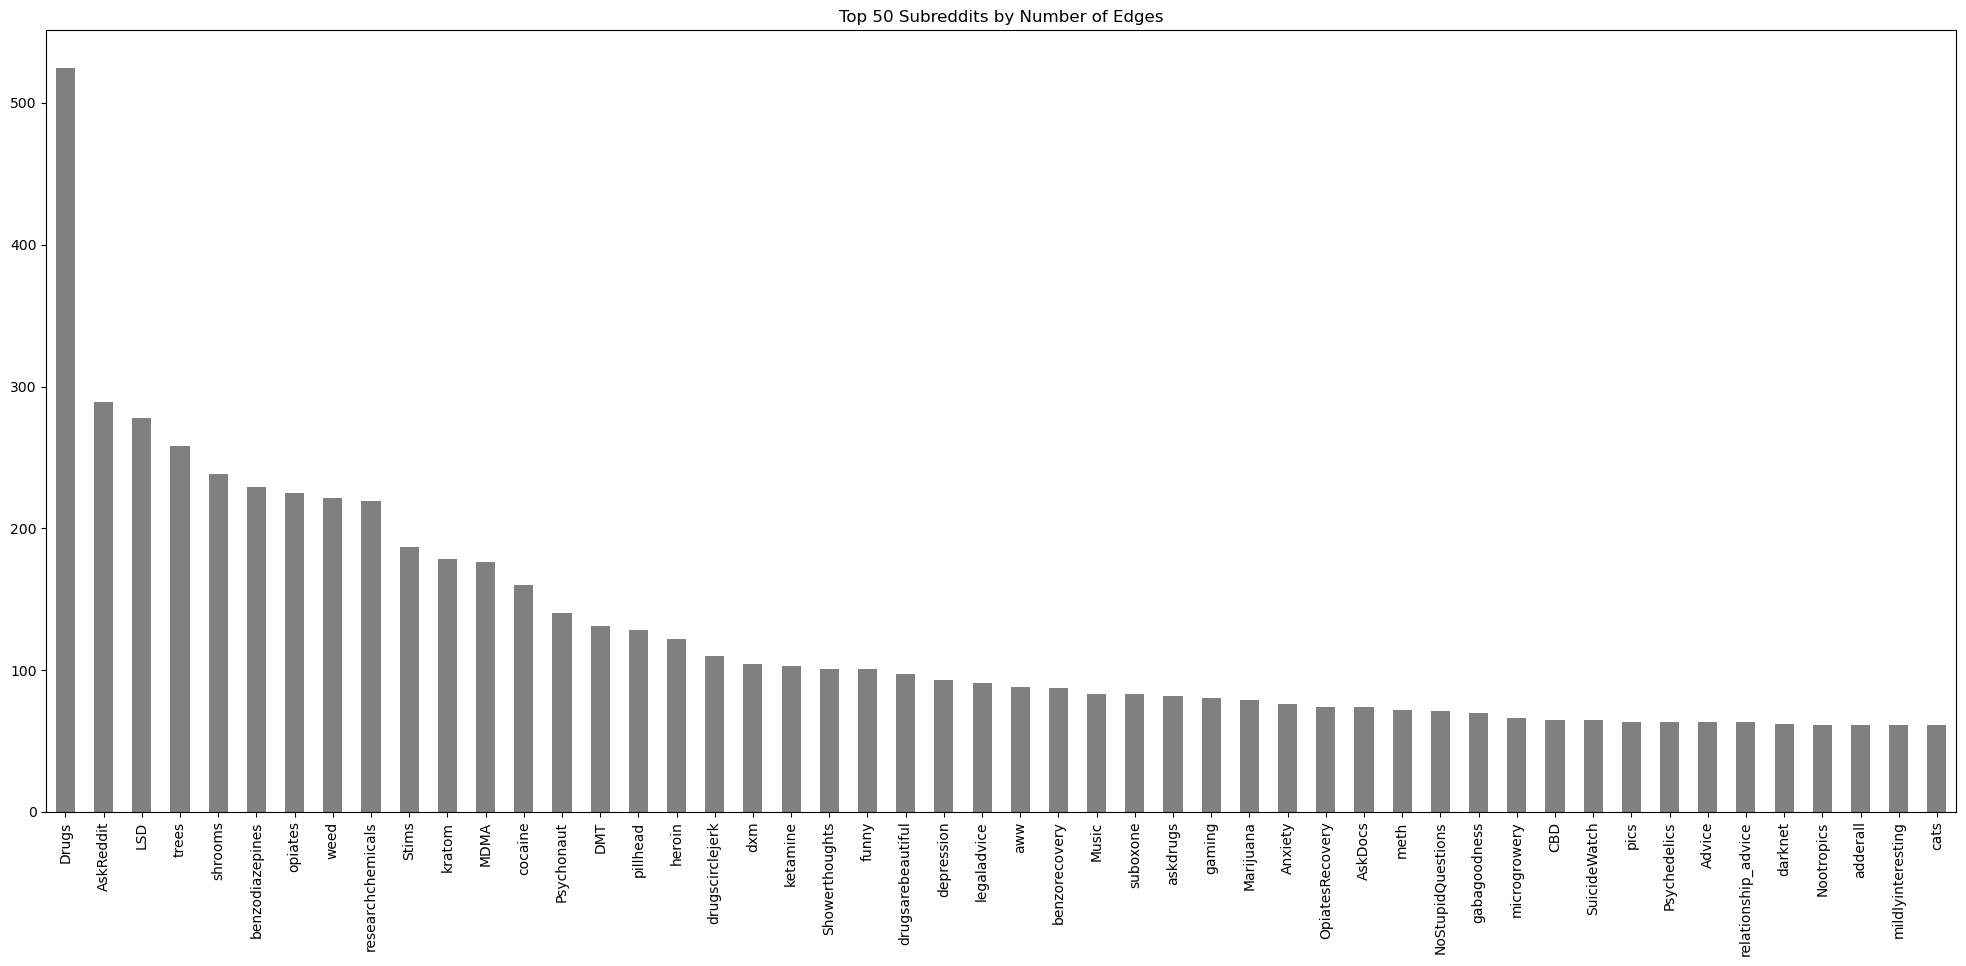

In [6]:
edges['target'].value_counts().head(50).plot(kind='bar', figsize=(20,10), title='Top 50 Subreddits by Number of Edges', color='grey')
# make text readable
plt.xticks(rotation=90)
# font size
plt.rcParams.update({'font.size': 18})
plt.tight_layout()
# export to pdf
import matplotlib.backends.backend_pdf
pdf = matplotlib.backends.backend_pdf.PdfPages("output/top50_subreddits.pdf")
pdf.savefig()
pdf.close()

In [7]:
# get the total number of edges in the network to and from each subreddit
print('Total number of edges to and from the LSD subreddit: ', edges[edges['target'] == 'LSD']['source'].count())
print('Total number of edges to and from the askreddit subreddit: ', edges[edges['target'] == 'AskReddit']['source'].count())
print('Total number of edges to and from the drugs subreddit: ', edges[edges['target'] == 'Drugs']['source'].count())


Total number of edges to and from the LSD subreddit:  278
Total number of edges to and from the askreddit subreddit:  289
Total number of edges to and from the drugs subreddit:  525


---

## network stats

In [8]:
g = nx.from_pandas_edgelist(edges, source='source', target='target')

In [9]:
print(nx.info(g))

Graph with 10418 nodes and 17400 edges


/var/folders/jj/bt0ykz9n5_16z2gvbybl0tbc0000gn/T/ipykernel_47869/1432719896.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(g))


In [10]:
# average degree
print('Average degree: ', np.mean(list(dict(g.degree()).values())))
# average clustering coefficient
print('Average clustering coefficient: ', nx.average_clustering(g))


Average degree:  3.340372432328662
Average clustering coefficient:  0.3912141060682134


the average degree of the network is 3.3 which suggests that the network is not very dense. the average clustering coefficient is 0.39 which suggests that the network is not very clustered. 

In [11]:
# degree centrality
deg_cen = nx.degree_centrality(g)
deg_cen = pd.DataFrame.from_dict(deg_cen, orient='index')
deg_cen.columns = ['degree_centrality']

print(deg_cen.sort_values(by='degree_centrality', ascending=False).head(20))

                    degree_centrality
benzodiazepines              0.470865
opiates                      0.462417
Psychedelics                 0.437074
cannabis                     0.300470
JuiceWRLD                    0.000384
guns                         0.000384
AskPhysics                   0.000384
Jazz                         0.000384
Poetry                       0.000384
DIY                          0.000384
likeus                       0.000384
MakeupAddiction              0.000384
schizophrenia                0.000384
fo76                         0.000384
GooglePixel                  0.000384
BrandNewSentence             0.000384
Skincare_Addiction           0.000384
Thailand                     0.000384
cigars                       0.000384
headphones                   0.000384


The degree centrality for a node v is the fraction of nodes it is connected to. It is used to determine what nodes are most connected. Here we can see the maximum Degree of centrality is of `benzo` (0.47), which means that most of the nodes are connected to the `opiates` subreddit and then to `psychadelics` (0.43).

In [12]:
# closeness centrality
close_cen = nx.closeness_centrality(g)
close_cen = pd.DataFrame.from_dict(close_cen, orient='index')
close_cen.columns = ['closeness_centrality']

print(close_cen.sort_values(by='closeness_centrality', ascending=False).head(20))

                  closeness_centrality
benzodiazepines               0.653964
Psychedelics                  0.639826
opiates                       0.596553
cannabis                      0.546824
Austria                       0.500096
booksuggestions               0.500096
GetStudying                   0.500096
PSVR                          0.500096
Outdoors                      0.500096
NZTrees                       0.500096
adventuretime                 0.500096
geopolitics                   0.500096
philosophy                    0.500096
assassinscreed                0.500096
history                       0.500096
donthelpjustfilm              0.500096
spirituality                  0.500096
animation                     0.500096
6thForm                       0.500096
AskAnAmerican                 0.500096


Closeness centrality measures the mean distance from one node to any other node. The more central a node is, the closer it is to all the other nodes. We see that, `benzo` has the highest closeness centrality (0.67) followed by `psychedelics`. From this, we can say that `benzo` is the most central subreddit in the network.

In [13]:
# betweenness centrality
bet_cen = nx.betweenness_centrality(g)
bet_cen = pd.DataFrame.from_dict(bet_cen, orient='index')
bet_cen.columns = ['betweenness_centrality']

print(bet_cen.sort_values(by='betweenness_centrality', ascending=False).head(20))


                 betweenness_centrality
Psychedelics                   0.412429
benzodiazepines                0.398538
opiates                        0.335372
cannabis                       0.287243
cycling                        0.000033
civ                            0.000033
computers                      0.000033
geopolitics                    0.000033
history                        0.000033
shitpost                       0.000033
LinusTechTips                  0.000033
fuckcars                       0.000033
careeradvice                   0.000033
careerguidance                 0.000033
grammar                        0.000033
Microbiome                     0.000033
ask_transgender                0.000033
research                       0.000033
6thForm                        0.000033
MensRights                     0.000033


Betweenness Centrality, Measures the number of shortest paths that the node lies on. This centrality is usually used to determine the flow of information through the graph.

Eigenvector Centrality, Measures the node’s relative influence in the network, or how well a node is connected to other highly connected nodes. From this, we can say that our top 3 nodes can be LSD, shrooms, Drugs.

In [14]:
eig_cen = nx.eigenvector_centrality(g, max_iter=1000)
eig_cen = pd.DataFrame.from_dict(eig_cen, orient='index')
eig_cen.columns = ['eigenvector_centrality']

print(eig_cen.sort_values(by='eigenvector_centrality', ascending=False).head(20))

                      eigenvector_centrality
benzodiazepines                     0.419368
opiates                             0.410640
Psychedelics                        0.347159
cannabis                            0.202525
islam                               0.013691
Daytrading                          0.013691
ChronicPain                         0.013691
alcoholism                          0.013691
paypal                              0.013691
GarageBand                          0.013691
malefashionadvice                   0.013691
Music                               0.013691
Psychiatry                          0.013691
rickandmorty                        0.013691
bipolar                             0.013691
Entrepreneur                        0.013691
LesbianActually                     0.013691
MakeMeSuffer                        0.013691
FoodPorn                            0.013691
PewdiepieSubmissions                0.013691


In [16]:
# write
# nx.write_gexf(g, 'data/subreddit_network_undir.gexf')

In [15]:
# add weights to edges
# weight is the number of users shared between two subreddits
# get the counts of each unique subreddit pair
edge_counts = edges.groupby(['source', 'target']).size().reset_index(name='weight')

# add edge weights to graph
for index, row in edge_counts.iterrows():
    g[row['source']][row['target']]['weight'] = row['weight']

# get the top 10 most connected subreddits
edge_counts.sort_values(by='weight', ascending=False).head(10)

,source,target,weight
13323,opiates,Drugs,221
5296,benzodiazepines,Drugs,209
15253,opiates,benzodiazepines,199
8500,benzodiazepines,opiates,199
1245,Psychedelics,LSD,113
12806,opiates,AskReddit,107
8742,benzodiazepines,researchchemicals,106
4024,Psychedelics,shrooms,104
4780,benzodiazepines,AskReddit,96
14634,opiates,Stims,90


In [16]:
g.get_edge_data('Drugs', 'benzodiazepines')

{'weight': 209}

---
## reduce network

In [17]:
edge_counts['weight'].describe()

count    17405.000000
mean         2.120483
std          5.344070
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        221.000000
Name: weight, dtype: float64

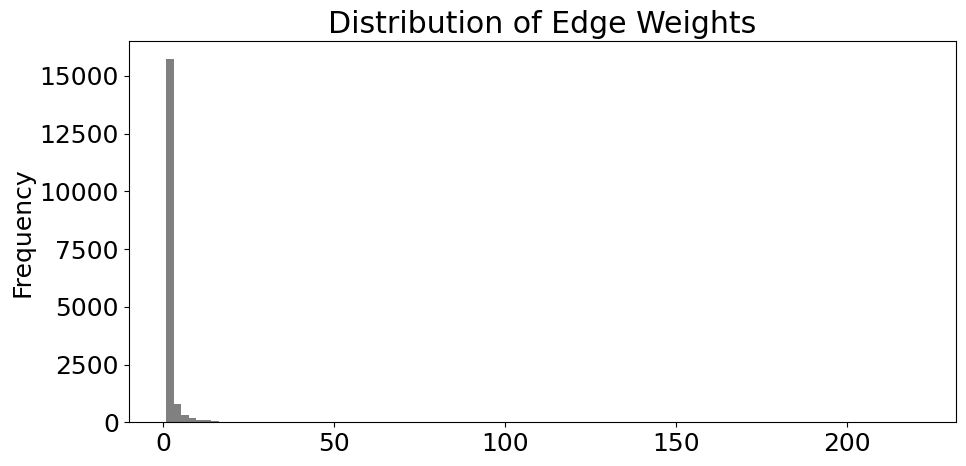

In [18]:
# bar plot of edge weights
edge_counts['weight'].plot(kind='hist', bins=100, figsize=(10,5), title='Distribution of Edge Weights', color='grey')
plt.tight_layout()
# show
plt.show()

In [19]:
# five num summary of degree
degree = pd.DataFrame.from_dict(dict(g.degree()), orient='index')
degree.columns = ['degree']
degree.describe()


,degree
count,10418.000000
mean,3.340372
std,86.371300
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,4905.000000


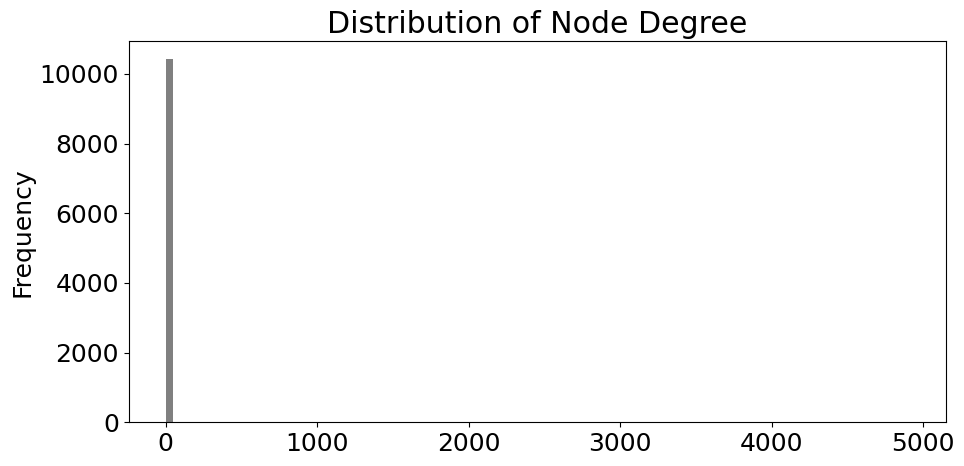

In [20]:
#bar plot of degree
degree['degree'].plot(kind='hist', bins=100, figsize=(10,5), title='Distribution of Node Degree', color='grey')
plt.tight_layout()
plt.show()

In [21]:
g2 = g.copy()

In [22]:
# remove nodes less than the mean
remove_nodes = []
for node in g2.nodes():
    if g2.degree(node) < 3:
        remove_nodes.append(node)

In [23]:
# remove nodes
g2.remove_nodes_from(remove_nodes)

In [24]:
print(nx.info(g2))

Graph with 1926 nodes and 6435 edges


/var/folders/jj/bt0ykz9n5_16z2gvbybl0tbc0000gn/T/ipykernel_47869/689116659.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(g2))


In [25]:
# write
nx.write_gexf(g2, 'data/subreddit_network_filtered_undir.gexf')

In [26]:
# export to csv
# with columns: source, target, weight
# edge_counts.to_csv('data/subreddit_network_filtered.csv', index=False)
nx.write_gml(g2, 'data/subreddit_network_filtered_undir.gml')
# nx.write_edgelist(g2, 'data/subreddit_network_filtered_undir.csv', delimiter=',', data=['weight'])

In [ ]:
# print(g2.nodes())

---
## Degree analysis

In [27]:
# degree centralist of g2
deg_cen = nx.degree_centrality(g2)
deg_cen = pd.DataFrame.from_dict(deg_cen, orient='index')
deg_cen.columns = ['degree_centrality']

print(deg_cen.sort_values(by='degree_centrality', ascending=False).head(20))

                   degree_centrality
benzodiazepines             0.939740
opiates                     0.937662
Psychedelics                0.894026
cannabis                    0.574026
Dynavap                     0.002078
MakeMeSuffer                0.002078
alcoholism                  0.002078
GarageBand                  0.002078
Music                       0.002078
Psychiatry                  0.002078
rickandmorty                0.002078
bipolar                     0.002078
Entrepreneur                0.002078
LesbianActually             0.002078
paypal                      0.002078
FoodPorn                    0.002078
AnimalsBeingDerps           0.002078
razer                       0.002078
StockMarket                 0.002078
CallOfDuty                  0.002078


In [32]:
# graph density
print('Graph density: ', nx.density(g2))

Graph density:  0.0031223941256721234


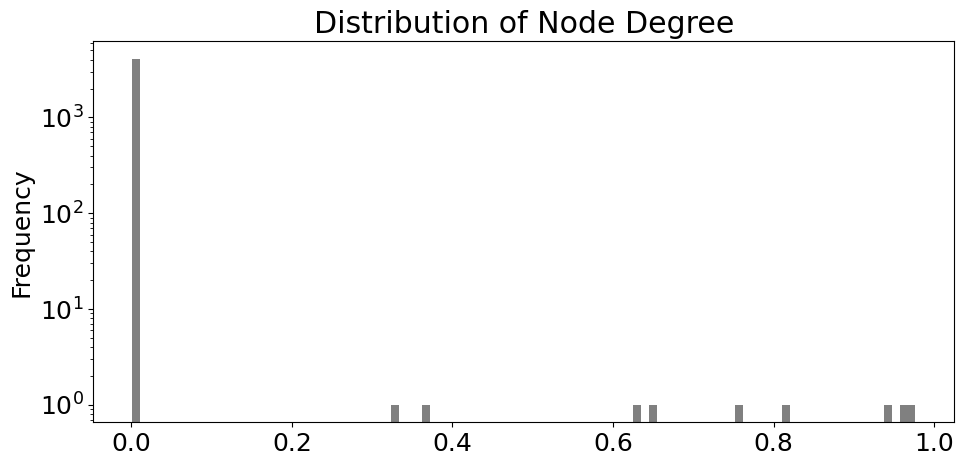

In [68]:
deg_cen['degree_centrality'].plot(kind='hist', bins=100, figsize=(10,5), title='Distribution of Node Degree', color='grey')
plt.yscale('log')
plt.tight_layout()
plt.show()

In [28]:
# average degre
d_bar=2*(len(g2.edges()))/len(g2.nodes())
print('Average degree: ', d_bar)

Average degree:  6.682242990654205


In [35]:
# from shadi network workshop: modeule 2
import matplotlib.pyplot as plt

def plot_degree_dist(Graph):
    
    """ To sparsify the adjacency matrix """
    M = nx.to_scipy_sparse_matrix(Graph)
    indegrees = M.sum(0).A[0]
    #outdegrees = M.sum(1).T.A[0]
    data = np.bincount(indegrees)
    
    """ Distribution as a histogram """
    plt.bar(range(len(data)),data)
    plt.xlim([0,(len(data))])
    plt.ylabel('Frequency')
    plt.xlabel('degree, d')
    #plt.xticks(range(len(data)))
    plt.show()
    plt.clf()
    
    """ Distribution as a Semilog-y plot """
    plt.plot(range(len(data)),data/data.sum(),'-b')
    plt.yscale('log')
    plt.xlim([0,(len(data))])
    plt.ylim([0,1])
    plt.ylabel('Pr(d)')
    plt.xlabel('degree, d')
    #plt.xticks(range(len(data)))
    plt.show()
    plt.clf()

    """ Distribution as a loglog plot """
    plt.plot(range(len(data)),data/data.sum(),'-b')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlim([0,(len(data))])
    plt.ylim([0,1])
    plt.ylabel('Pr(d)')
    plt.xlabel('degree, d')
    plt.show()
    plt.clf()

    """ Complementary Cumulative Distribution Function (CCDF as a loglog plot) """
    s = float(data.sum())
    ccdf = 1- data.cumsum(0)/s
    plt.plot(range(len(ccdf)),ccdf,'-b')
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim([0,1])
    plt.ylabel('CCDF, Pr(K>d)')
    plt.xlabel('degree, d')
    plt.show()
    plt.clf()

/var/folders/jj/bt0ykz9n5_16z2gvbybl0tbc0000gn/T/ipykernel_12848/948375632.py:7: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `to_scipy_sparse_array` instead.
  M = nx.to_scipy_sparse_matrix(Graph)


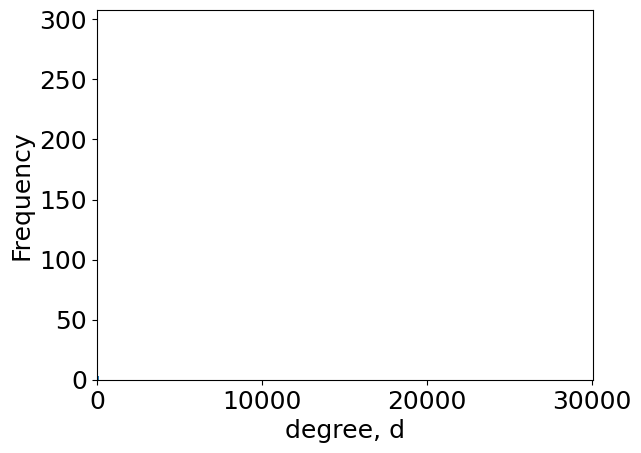

/var/folders/jj/bt0ykz9n5_16z2gvbybl0tbc0000gn/T/ipykernel_12848/948375632.py:25: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([0,1])


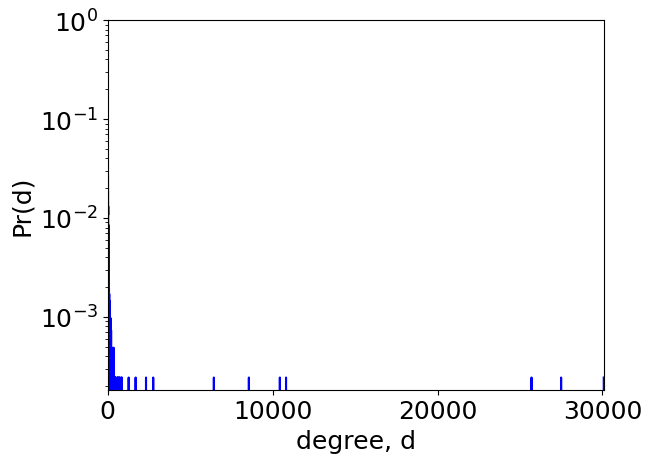

/var/folders/jj/bt0ykz9n5_16z2gvbybl0tbc0000gn/T/ipykernel_12848/948375632.py:36: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0,(len(data))])
/var/folders/jj/bt0ykz9n5_16z2gvbybl0tbc0000gn/T/ipykernel_12848/948375632.py:37: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([0,1])


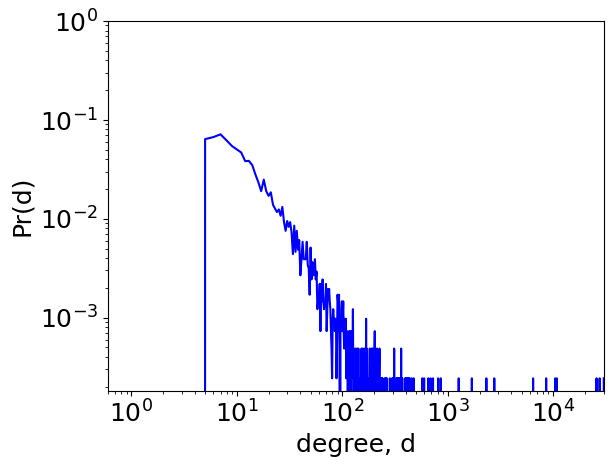

/var/folders/jj/bt0ykz9n5_16z2gvbybl0tbc0000gn/T/ipykernel_12848/948375632.py:49: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([0,1])


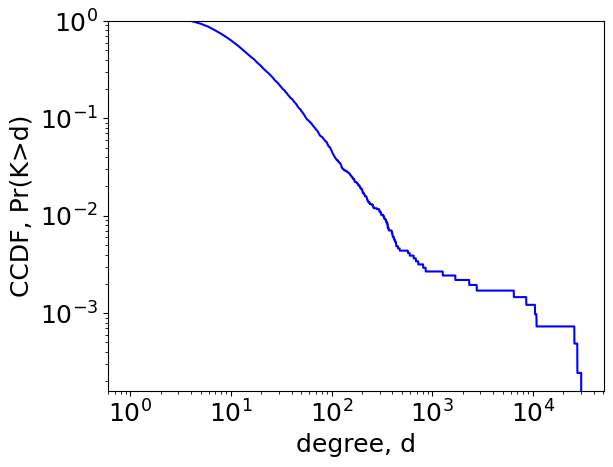

<Figure size 640x480 with 0 Axes>

In [36]:
plot_degree_dist(g2)

In [38]:
# isolates?
print('Isolates: ', nx.number_of_isolates(g2))

Isolates:  0


In [39]:
def returnAverage(myDict): 
    sum = 0
    for i in myDict: 
        sum = sum + myDict[i] 
    ave = sum / len(myDict)
    return ave

In [40]:
print('number of nodes: ', len(g2.nodes))
print ('global_clusterng_coefficient: ', nx.transitivity(g2))
print ('average_degree_centrality: ', returnAverage(nx.degree_centrality(g2)))
print ('density: ', nx.density(g2))
print ('average_clustering_coefficient: ', returnAverage(nx.clustering(nx.Graph(g2))))
# print ('triadic_census: ', nx.triadic_census(g3))

number of nodes:  4107
global_clusterng_coefficient:  0.005215338641875276
average_degree_centrality:  0.0031223941256718437
density:  0.0031223941256721234
average_clustering_coefficient:  0.9937751431477385


In [ ]:
# if nx.number_weakly_connected_components(g3) == 1:
#     print ('shortest_path: ',nx.average_shortest_path_length(g3))
        
# else:
#     print ('NOTE: Shortest path cannot be calculated. Graph is not connected.')

# not implemented for undirected graphs

---
## G2

In [79]:
print(nx.info(g2), "average degree: ", nx.average_degree_connectivity(g2))

Graph with 4107 nodes and 26327 edges average degree:  {2575: 16.079223300970874, 9: 2929.1111111111113, 3874: 12.268456375838927, 7: 3216.0768578215134, 6: 3317.7509881422925, 8: 3095.2392026578073, 3090: 14.246278317152104, 5: 3407.950341685649, 3943: 12.12908952574182, 4010: 12.00498753117207, 2685: 15.601117318435755, 3337: 13.53431225651783, 1496: 22.891042780748663, 1352: 24.630177514792898}


/var/folders/jj/bt0ykz9n5_16z2gvbybl0tbc0000gn/T/ipykernel_12848/2220232364.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(g2), "average degree: ", nx.average_degree_connectivity(g2))


['Drugs', 'LSD', 'shrooms', 'opiates', 'Psychedelics']

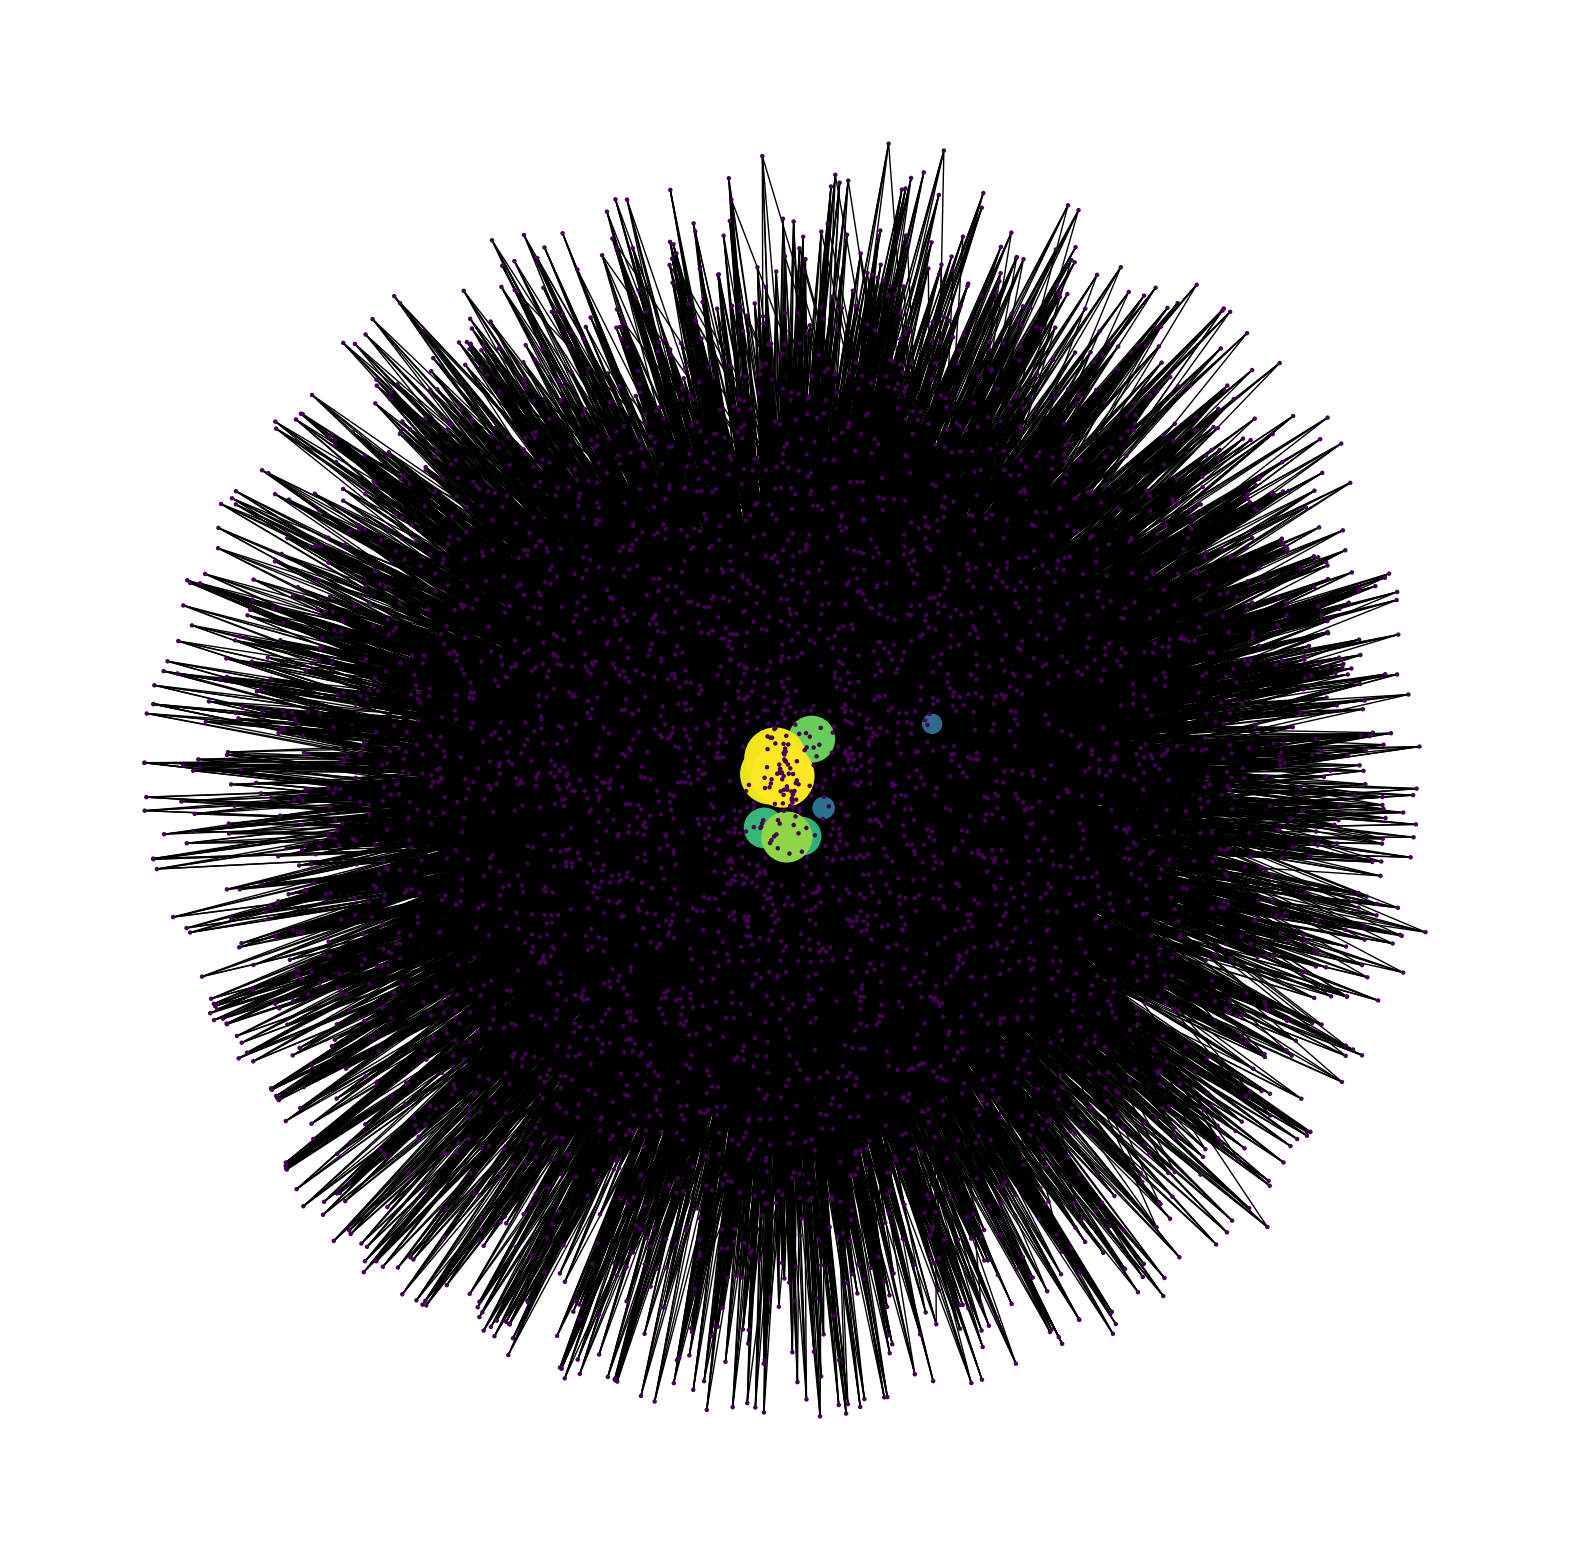

In [80]:
pos = nx.spring_layout(g2)
betCent = nx.betweenness_centrality(g2, normalized=True, endpoints=True)
node_color = [20000.0 * g2.degree(v) for v in g2]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(g2, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
sorted(betCent, key=betCent.get, reverse=True)[:5]

In [ ]:
pos = nx.spring_layout(g2)
degCent = nx.degree_centrality(g2)
node_color = [20000.0 * g2.degree(v) for v in g2]
node_size =  [v * 10000 for v in degCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(g2, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

sorted(degCent, key=degCent.get, reverse=True)[:5]

---
## visualize ego network (G2)

https://medium.com/web-mining-is688-spring-2021/how-influencers-on-reddit-form-a-network-of-related-subreddits-30884134c137

The following functions are served by Ego Networks:
https://www.geeksforgeeks.org/ego-graph-using-networkx-in-python/# 
- Propagation of information efficiently.
- Sensemaking from links, For example – Social links, relationships.
- Access to resources, efficient connection path generation.
- Community detection, identification of the formation of groups.
- Analysis of the ties among individuals for social support.

In [29]:
drug_subs = ['Psychedelics', 
       'benzodiazepines', 'opiates', 'cannabis', 'stims']

In [15]:
def get_ego(ego, G):
        hub_ego = nx.ego_graph(G, ego, radius=1)
        pos = nx.fruchterman_reingold_layout(G)
        options = {"node_size": 600, "node_color": "r"}
        # showing the ego network
        nx.draw(hub_ego, pos, node_color="lavender", 
                node_size = 200, with_labels = False, font_size = 8)

        nx.draw_networkx_nodes(
                hub_ego, pos, nodelist = [ego], **options)
        figsize=(20,20)
        # plt.show()
#     export ego network to csv
        # path = 'data/' + ego + '_ego_network.csv'
        # nx.write_weighted_edgelist(hub_ego, path, delimiter=',')


In [18]:
cocaine = nx.ego_graph(g2, "cocaine", radius=1)

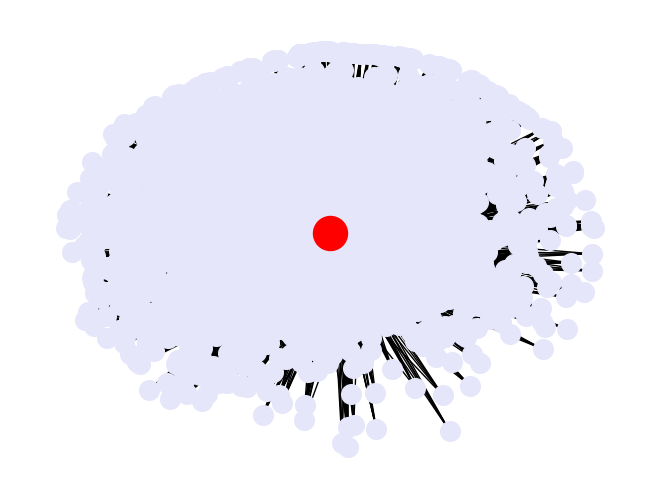

In [16]:
cocaine = get_ego('cocaine', g2)

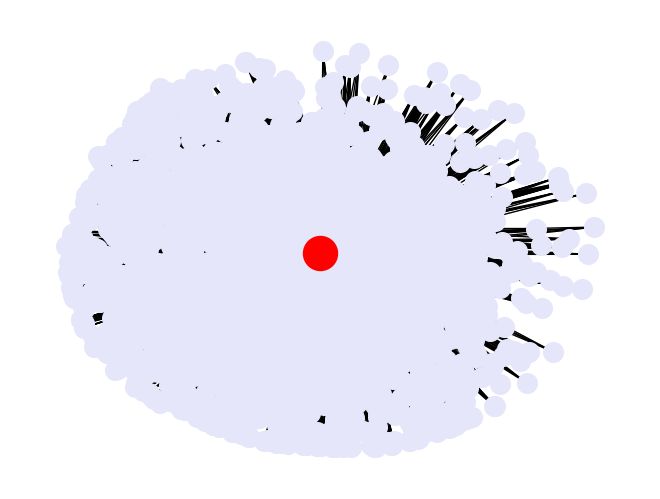

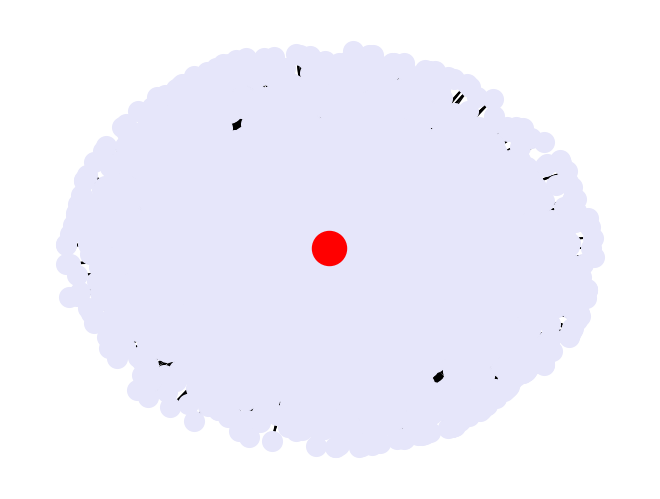

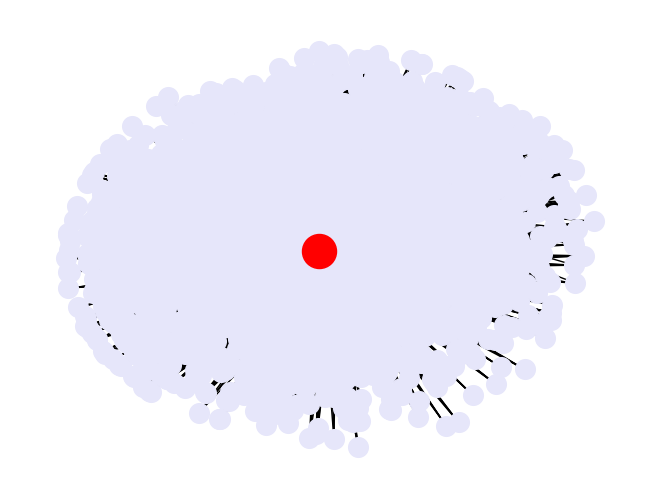

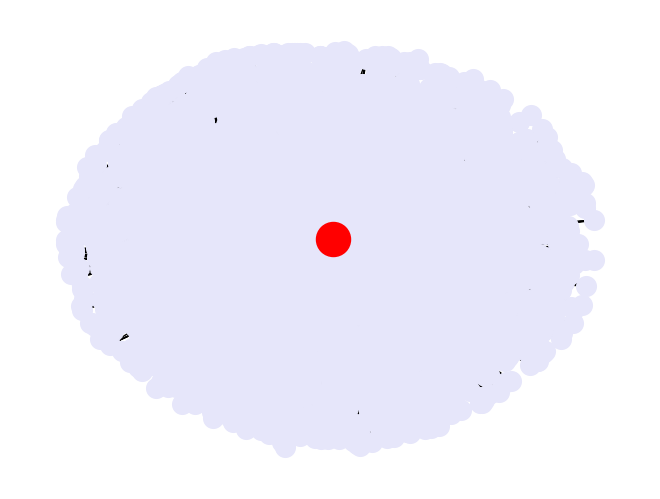

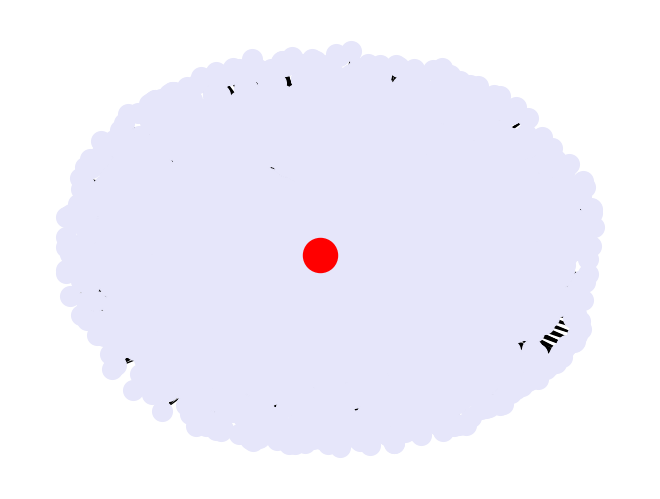

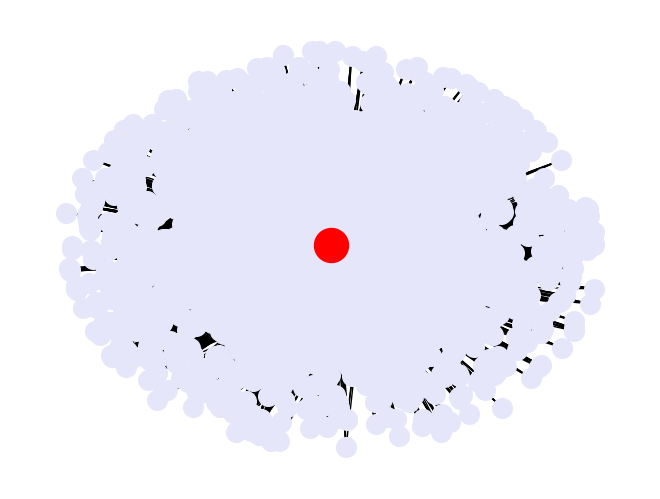

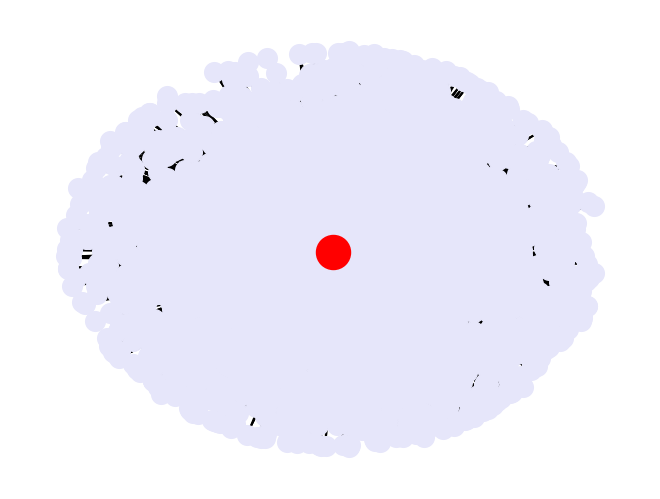

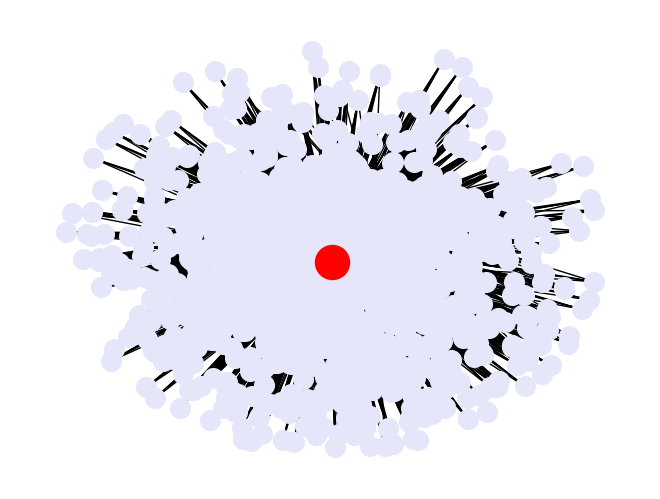

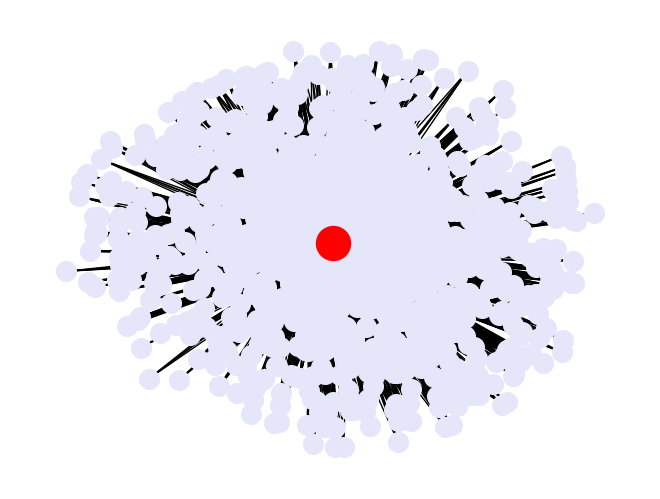

In [63]:
for sub in drug_subs:
    get_ego(sub, g2)

---
## network analysis

In [ ]:
from networkx.algorithms.community import greedy_modularity_communities

communities2 = greedy_modularity_communities(g2)
print("total number of communities: ", len(communities2))
print("-----------------------------")
print("number of nodes in each community: ", [len(c) for c in communities2])
print("-----------------------------")
print("community 1: ", communities2[0])
print("-----------------------------")
print("community 2: ", communities2[1])
print("-----------------------------")
print("community 3: ", communities2[2])

In [67]:
# list of nodes with highest degree that are not in drug subs
nodes = g3.nodes(data=False)
# sort nodes by degree
sorted_nodes = sorted(nodes, key=lambda x: g3.degree(x), reverse=True)
# filter if in drug subs

# per each community
for i in range(0, len(communities2)):
    print("community ", i)
    # get nodes in community
    nodes = communities2[i]
    # sort nodes by degree
    sorted_nodes = sorted(nodes, key=lambda x: g3.degree(x), reverse=True)
    # filter if in drug subs
    sorted_nodes = [node for node in sorted_nodes if node not in drug_subs]
    # print top 10
    print(sorted_nodes[0:10])


community  0
['todayilearned', 'meth', 'Cigarettes', 'Tinder', 'buildapcforme', 'malehairadvice', 'Salvia', 'Bitcoin', 'Jokes', 'borderlands3']
community  1
['drunk', 'rarepuppers', 'lean', 'kratom', 'hiphopheads', 'nfl', 'me_irl', 'electronic_cigarette', 'UFOs', 'bipolar']
community  2
['writing', 'phenibut', 'technology', 'vinyl', 'trashy', 'socialanxiety', 'vegan', 'pokemon', 'weed', 'pcmasterrace']
